In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import tensorflow as tf

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

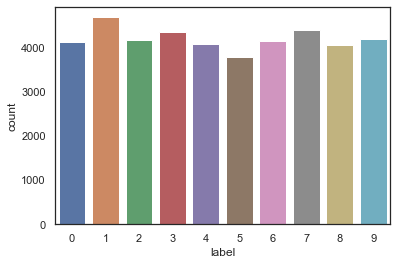

In [3]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [4]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [5]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [6]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [7]:
# Set the random seed
random_seed = 2

In [8]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

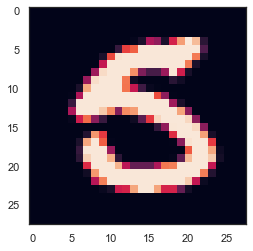

In [9]:
# Some examples
g = plt.imshow(X_train[4][:,:,0])

In [17]:
checkpoint_path = "logs/checkpoints/"


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

epochs=50

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                        monitor="accuracy",
                                        save_best_only=True,
                                        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=15)
]

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=epochs, callbacks=callbacks, batch_size=64)

Train on 37800 samples
Epoch 1/50
37800/37800 [==============================] - 98s 3ms/sample - loss: 0.3518 - accuracy: 0.8893
Epoch 2/50
37800/37800 [==============================] - 93s 2ms/sample - loss: 0.0953 - accuracy: 0.9719
Epoch 3/50
37800/37800 [==============================] - 94s 2ms/sample - loss: 0.0752 - accuracy: 0.9776
Epoch 4/50
37800/37800 [==============================] - 95s 3ms/sample - loss: 0.0657 - accuracy: 0.9800
Epoch 5/50
37800/37800 [==============================] - 94s 2ms/sample - loss: 0.0574 - accuracy: 0.9829
Epoch 6/50
37800/37800 [==============================] - 93s 2ms/sample - loss: 0.0508 - accuracy: 0.9848
Epoch 7/50
37800/37800 [==============================] - 95s 3ms/sample - loss: 0.0453 - accuracy: 0.9861
Epoch 8/50
37800/37800 [==============================] - 94s 2ms/sample - loss: 0.0415 - accuracy: 0.9868
Epoch 9/50
37800/37800 [==============================] - 93s 2ms/sample - loss: 0.0405 - accuracy: 0.9874
Epoch 10/50
37

In [18]:
model.load_weights(checkpoint_path)

In [21]:
labels = [np.argmax(predict) for predict in model.predict(test)]
df = pd.DataFrame({
    "ImageId": list(range(1, len(test)+1)),
    "Label": labels,
})

In [22]:
model.save("my_model.h5")

In [23]:
df.to_csv("my_submission.csv", index=False)

In [25]:
my_sub = pd.read_csv('my_submission.csv')

In [26]:
my_sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


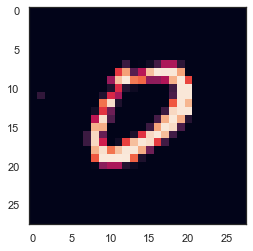

In [30]:
g = plt.imshow(test[3][:,:,0])